In [2]:
import pandas as pd
import numpy as np

In [3]:
songs = pd.read_csv('./songs_normalize.csv')

In [4]:
songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [5]:
songs['artist'].value_counts()

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: artist, Length: 835, dtype: int64

In [6]:
popularidade = songs['popularity'].unique()

In [7]:
np.sort(popularidade)

array([ 0,  1,  2,  3,  4,  6,  7,  8, 11, 16, 17, 18, 21, 24, 26, 27, 28,
       30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 86, 87, 88, 89])

In [8]:
keys = songs['key'].unique()

In [9]:
np.sort(keys)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
songs[songs['year']==1998]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
44,Missy Elliott,Hot Boyz,215466,True,1998,49,0.727,0.445,1,-11.241,1,0.291,0.339,0.0,0.18,0.527,81.125,"hip hop, pop, R&B"


In [11]:
songs['genre'].unique()

array(['pop', 'rock, pop', 'pop, country', 'rock, metal',
       'hip hop, pop, R&B', 'hip hop', 'pop, rock', 'pop, R&B',
       'Dance/Electronic', 'pop, Dance/Electronic',
       'rock, Folk/Acoustic, easy listening', 'metal', 'hip hop, pop',
       'R&B', 'pop, latin', 'Folk/Acoustic, rock',
       'pop, easy listening, Dance/Electronic', 'rock',
       'rock, blues, latin', 'pop, rock, metal', 'rock, pop, metal',
       'hip hop, R&B', 'pop, Folk/Acoustic', 'set()',
       'hip hop, pop, latin', 'hip hop, Dance/Electronic',
       'hip hop, pop, rock', 'World/Traditional, Folk/Acoustic',
       'Folk/Acoustic, pop', 'rock, easy listening',
       'World/Traditional, hip hop', 'hip hop, pop, R&B, latin',
       'rock, blues', 'rock, R&B, Folk/Acoustic, pop', 'latin',
       'pop, R&B, Dance/Electronic', 'World/Traditional, rock',
       'pop, rock, Dance/Electronic', 'pop, easy listening, jazz',
       'rock, Dance/Electronic', 'World/Traditional, pop, Folk/Acoustic',
       'countr

In [12]:
songs['genre'].value_counts()

pop                                      428
hip hop, pop                             277
hip hop, pop, R&B                        244
pop, Dance/Electronic                    221
pop, R&B                                 178
hip hop                                  124
hip hop, pop, Dance/Electronic            78
rock                                      58
rock, pop                                 43
Dance/Electronic                          41
rock, metal                               38
pop, latin                                28
pop, rock                                 26
set()                                     22
hip hop, Dance/Electronic                 16
latin                                     15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
country                                   10
metal                                      9
hip hop, p

In [17]:
songs[songs['genre']=='pop']['artist'].value_counts()

Britney Spears    19
Katy Perry        16
Taylor Swift      16
P!nk              15
Ariana Grande     14
                  ..
Kris Allen         1
Big Brovaz         1
A1                 1
INNA               1
BTS                1
Name: artist, Length: 135, dtype: int64

In [224]:
pop_songs = songs[songs[['artist','genre']]['genre']=='pop']

In [297]:
artists = pop_songs[['artist']].groupby('artist').value_counts().reset_index()


In [298]:
artists.columns = ['artist', 'count']

In [306]:
top_5 = artists[artists['count'] > 14]

In [304]:
artists_df = pd.DataFrame(top_5)

In [284]:
artists_df

,artist
artist,
*NSYNC,4
5 Seconds of Summer,3
A1,1
Adam Lambert,2
Akon,8
...,...
Train,2
Vengaboys,1
Westlife,4


In [314]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Qtd de músicas registradas')

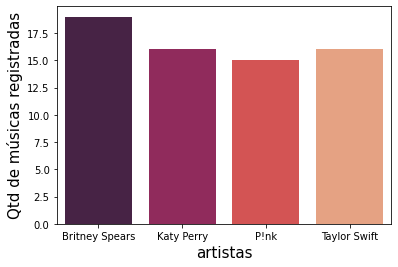

In [317]:
sns.barplot(x='artist', y='count', data=top_5, palette="rocket")
plt.xlabel('artistas', fontsize=15)
plt.ylabel('Qtd de músicas registradas', fontsize=15)